<a href="https://colab.research.google.com/github/frishtajalal/project-earthquake/blob/main/Copy_of_earthquake.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd   # bo away ready file kaman bkain
import numpy as np   #bo hazhmara birkaryakan w random ya array
import scipy.stats as st   # bo probability destribution
import matplotlib.pyplot as plt  #  bo keshani wenakan  w histogram
import seaborn as sns  # bo color
sns.set(color_codes=True) #bo henani hamu color kan


In [ ]:
mydata = pd.read_csv('dataset.csv')

In [ ]:
mydata.head(7)



,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource,Unnamed: 22
0,2022-01-10T18:29:47.778Z,35.5088,44.8992,10.0,4.5,mb,NaN,110.0,0.480,0.99,...,"6 km ESE of Jamjam?l, Iraq",earthquake,5.2,1.7,0.096,32.0,reviewed,us,us,NaN
1,2021-11-28T16:11:20.633Z,34.3978,45.7435,10.0,4.3,mb,NaN,75.0,0.717,0.89,...,"13 km WSW of Sarpol-e Z?ah?b, Iran",earthquake,5.7,1.9,0.137,18.0,reviewed,us,us,NaN
2,2021-09-28T11:46:12.021Z,34.5294,45.3747,10.0,4.3,mb,NaN,71.0,0.651,0.44,...,"41 km ESE of Kifr?, Iraq",earthquake,2.1,1.9,0.093,33.0,reviewed,us,us,2022-01-10T18:29:47.778Z
3,2021-09-28T08:58:23.893Z,34.4735,45.5293,10.0,4.3,mb,NaN,65.0,0.660,0.76,...,"30 km W of Sarpol-e Z?ah?b, Iran",earthquake,7.0,1.9,0.161,11.0,reviewed,us,us,10
4,2021-09-24T23:43:12.390Z,36.7164,42.4005,10.0,4.4,mb,NaN,104.0,0.400,0.93,...,"51 km S of Ã‡iftlikkÃ¶yÃ¼, Turkey",earthquake,2.7,1.9,0.130,17.0,reviewed,us,us,NaN
5,2021-09-08T15:43:01.607Z,34.6514,45.3500,10.0,4.5,mb,NaN,46.0,0.555,0.78,...,"35 km E of Kifr?, Iraq",earthquake,5.6,1.9,0.079,47.0,reviewed,us,us,NaN
6,2021-08-05T10:33:24.499Z,32.6903,47.4869,10.0,4.1,mb,NaN,98.0,2.831,0.72,...,"20 km E of Dehlor?n, Iran",earthquake,8.8,1.9,0.140,14.0,reviewed,us,us,NaN


In [ ]:
mydata.tail(7)

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource,Unnamed: 22
1178,1958-08-16T19:13:48.000Z,34.290,47.867,15.0,6.7,mw,NaN,NaN,NaN,NaN,...,"25 km SSW of Kang?var, Iran",earthquake,NaN,NaN,NaN,NaN,automatic,iscgem,iscgem,NaN
1179,1958-08-14T15:26:24.000Z,34.429,48.043,15.0,5.7,mw,NaN,NaN,NaN,NaN,...,"10 km SE of Kang?var, Iran",earthquake,NaN,NaN,NaN,NaN,automatic,iscgem,iscgem,NaN
1180,1958-08-14T11:27:04.000Z,34.225,47.827,15.0,5.8,mw,NaN,NaN,NaN,NaN,...,"21 km NW of N?r?b?d, Iran",earthquake,NaN,NaN,NaN,NaN,automatic,iscgem,iscgem,NaN
1181,1958-05-05T05:21:34.000Z,35.644,44.668,15.0,5.5,mw,NaN,NaN,NaN,NaN,...,"19 km NW of Jamjam?l, Iraq",earthquake,NaN,NaN,NaN,NaN,automatic,iscgem,iscgem,NaN
1182,1957-12-13T01:45:04.000Z,34.388,47.748,15.0,6.5,mw,NaN,NaN,NaN,NaN,...,"19 km NE of Hars?n, Iran",earthquake,NaN,NaN,NaN,NaN,automatic,iscgem,iscgem,NaN
1183,1956-02-03T13:16:05.000Z,32.991,46.606,15.0,5.8,mw,NaN,NaN,NaN,NaN,...,"43 km ESE of Mehr?n, Iran",earthquake,NaN,NaN,NaN,NaN,automatic,iscgem,iscgem,NaN
1184,NaN,NaN,NaN,NaN,1.5,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
mydata.info()  #haman eshi describa bas ba xshta time 649 jar dubara botawa datatypakai objecta

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1185 entries, 0 to 1184
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   time             1184 non-null   object 
 1   latitude         1184 non-null   float64
 2   longitude        1184 non-null   float64
 3   depth            1184 non-null   float64
 4   mag              1185 non-null   float64
 5   magType          1184 non-null   object 
 6   nst              305 non-null    float64
 7   gap              628 non-null    float64
 8   dmin             395 non-null    float64
 9   rms              997 non-null    float64
 10  net              1184 non-null   object 
 11  id               1184 non-null   object 
 12  updated          1184 non-null   object 
 13  place            1184 non-null   object 
 14  type             1184 non-null   object 
 15  horizontalError  414 non-null    float64
 16  depthError       672 non-null    float64
 17  magError      

In [ ]:
mydata.describe() #chanjar datakan dubara bunatawa

,latitude,longitude,depth,mag,nst,gap,dmin,rms,horizontalError,depthError,magError,magNst
count,1184.000000,1184.000000,1184.000000,1185.000000,305.000000,628.000000,395.000000,997.000000,414.000000,672.000000,506.000000,985.000000
mean,33.804549,46.514615,22.601242,4.453418,67.645902,96.741561,2.126241,0.977021,6.699517,4.894048,0.110567,28.723858
std,1.434778,1.542107,17.531223,0.454973,69.746528,49.837293,2.081324,0.294067,2.290003,5.311113,0.055812,34.625800
min,29.041300,38.837000,0.000000,1.500000,4.000000,22.000000,0.051000,0.100000,2.100000,0.000000,0.032000,1.000000
25%,32.677500,45.670400,10.000000,4.200000,23.000000,60.975000,0.690500,0.790000,5.400000,1.900000,0.073250,8.000000
50%,33.566150,46.753500,13.065000,4.400000,42.000000,77.000000,1.294000,0.970000,6.300000,2.000000,0.099500,18.000000
75%,34.579075,47.709250,33.000000,4.700000,87.000000,122.000000,2.764500,1.170000,7.700000,5.900000,0.136750,36.000000
max,37.421000,48.613700,152.200000,7.300000,449.000000,292.000000,9.218000,4.140000,28.900000,40.200000,0.536000,334.000000


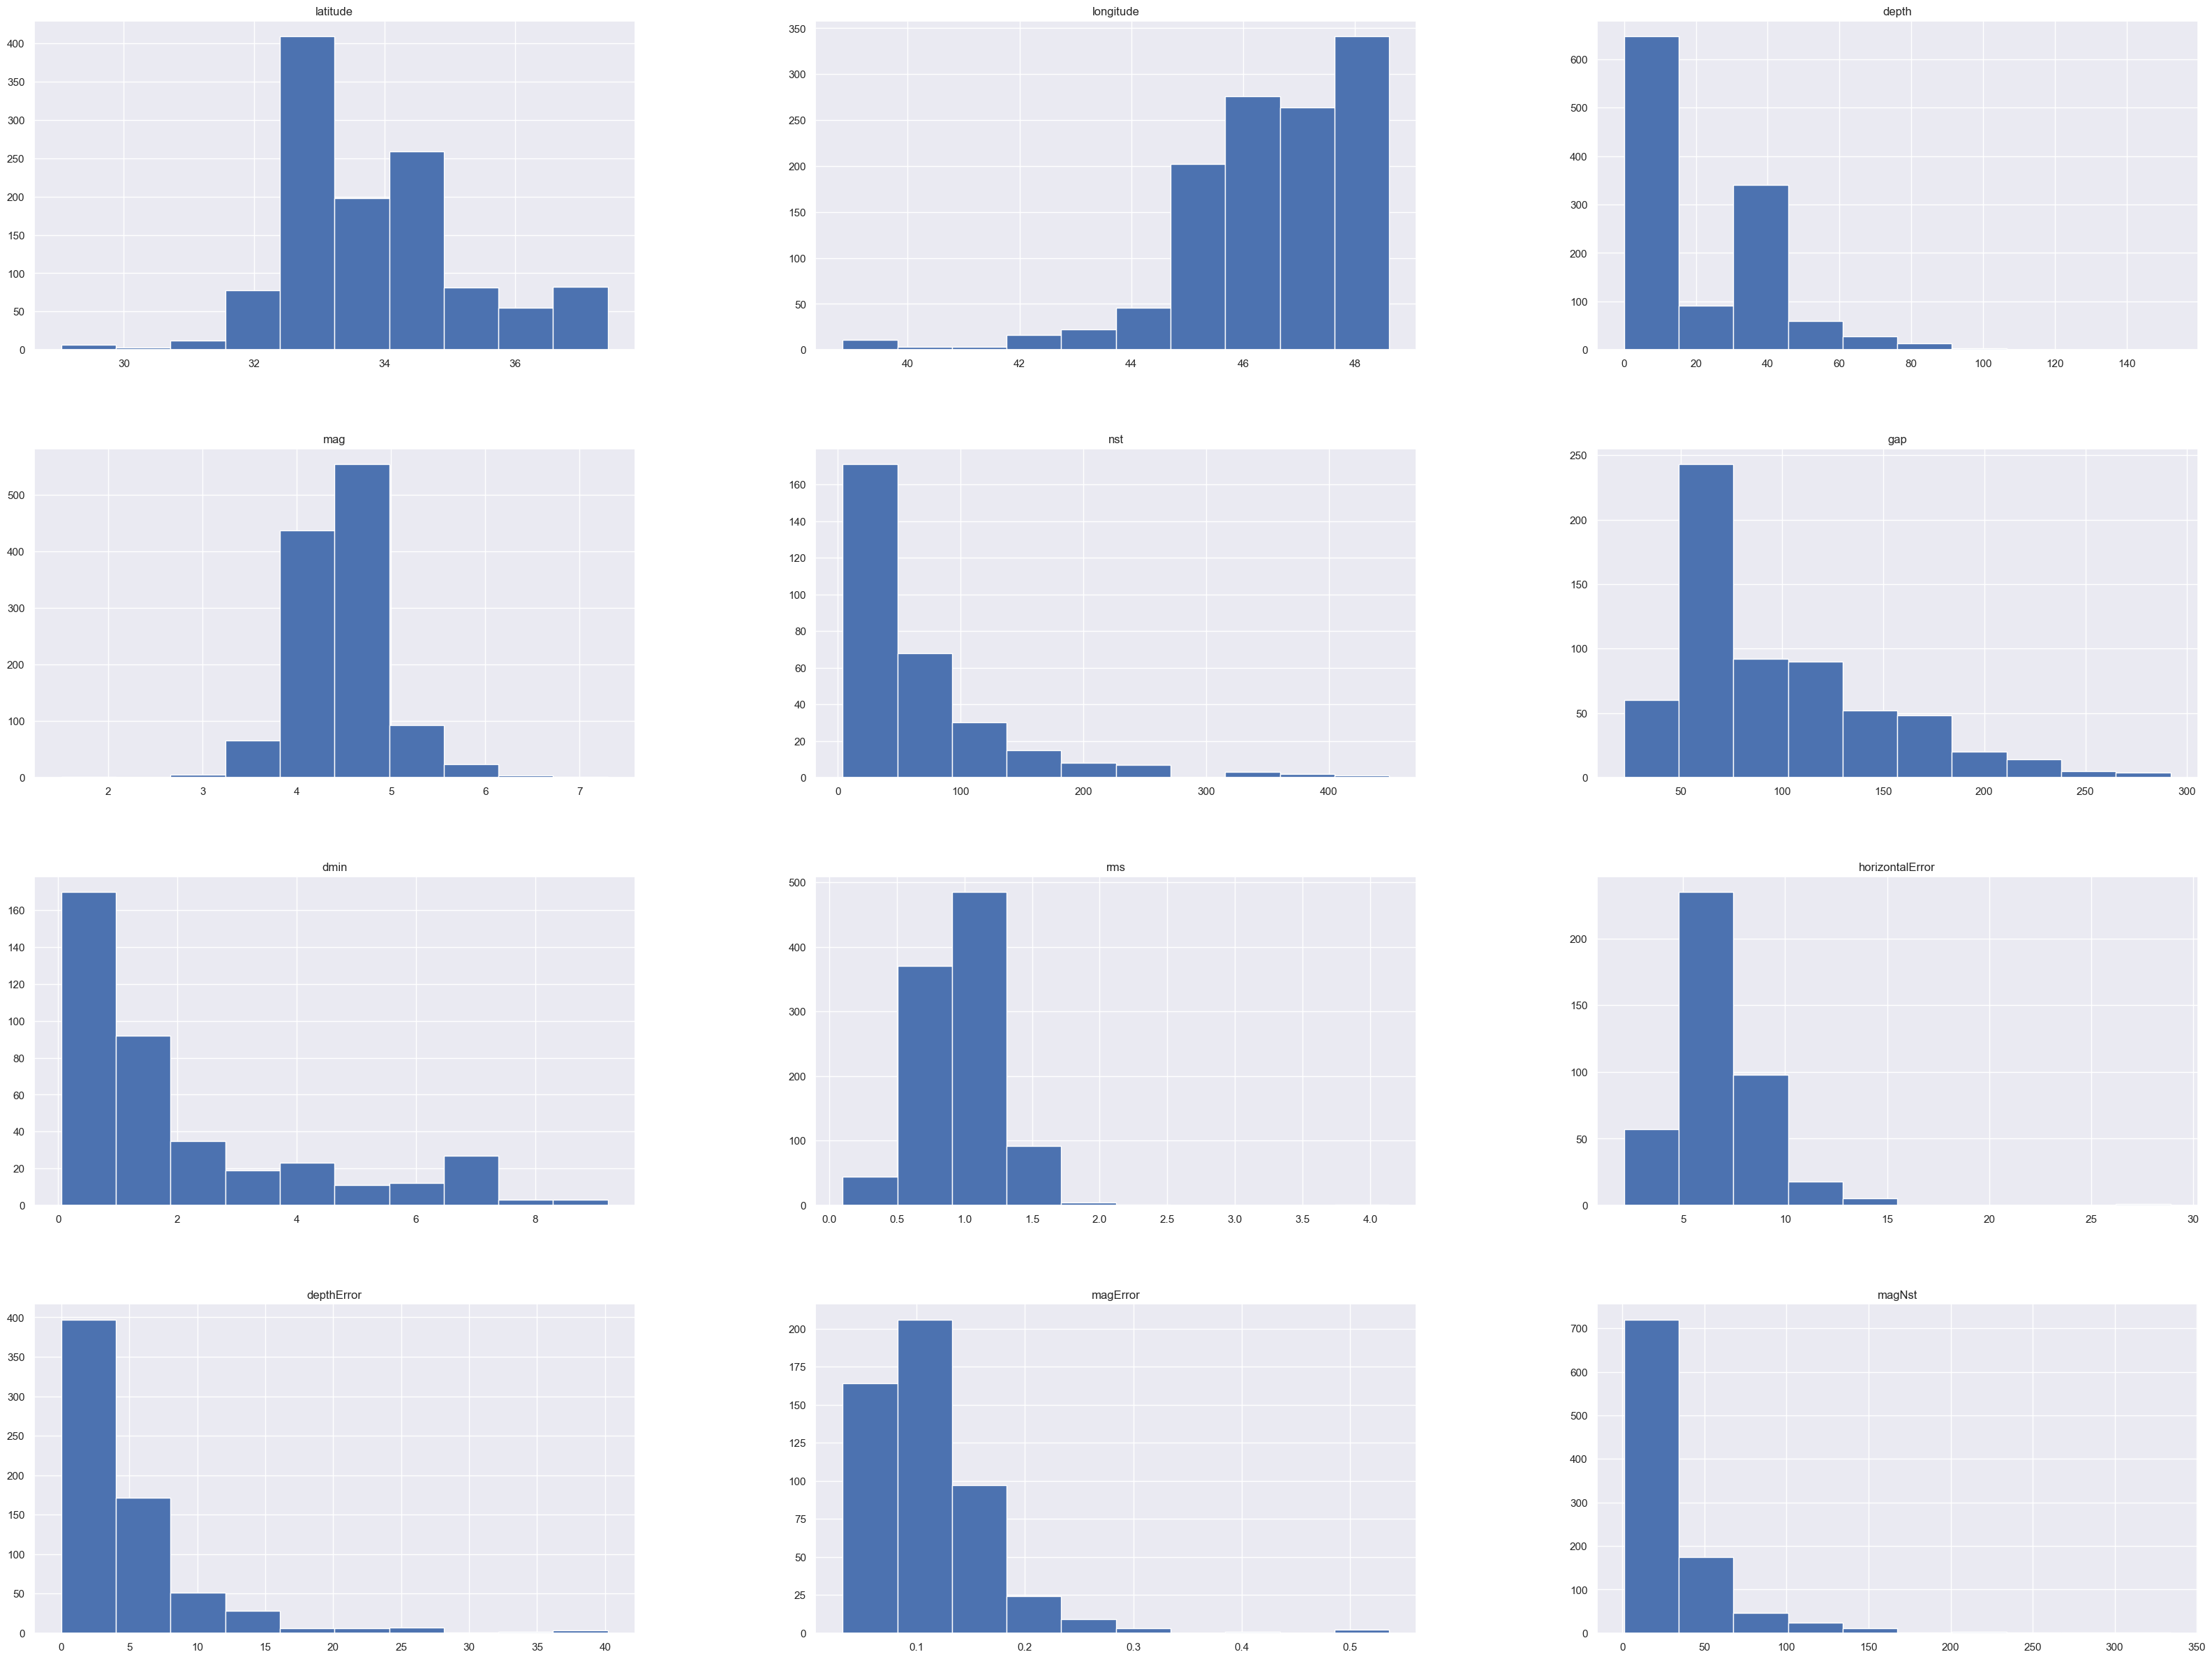

In [ ]:
import matplotlib.pyplot as plt  #histogram drus akat lasar au columnanai ka hamana
%matplotlib inline

mydata.hist(figsize=(40,30))
plt.show()

<Axes: xlabel='longitude', ylabel='magSource'>

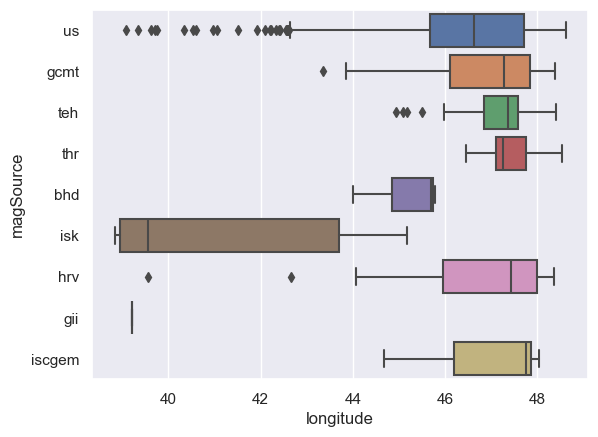

In [ ]:
import seaborn as sns    #aw xalla rashana outlier, xatakau nawrast box kan median'a ,box ka hamui IQR ka Q1 xaty yakamy box lower quartile, Q2 median w Q3 xaty 3 upper quartile
#am sar w awsary boxala maxmum w minimum , b o away bilain bo vertical x w y ka agorin    mean u mode u mideani tya dozrawatawa

sns.boxplot(y="magSource", x="longitude", data=mydata)

In [ ]:
pd.crosstab(mydata['longitude'],mydata['magSource'] ) #bo barawrdi du column yan zyatr

magSource,bhd,gcmt,gii,hrv,iscgem,isk,teh,thr,us
longitude,,,,,,,,,
38.8370,0,0,0,0,0,1,0,0,0
38.9450,0,0,0,0,0,1,0,0,0
38.9560,0,0,0,0,0,1,0,0,0
39.0853,0,0,0,0,0,0,0,0,1
39.2120,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
48.5910,0,0,0,0,0,0,0,0,1
48.5970,0,0,0,0,0,0,0,0,1
48.6020,0,0,0,0,0,0,0,0,1


In [ ]:
pd.crosstab(mydata['longitude'],mydata['magType'] )  #haman eshi sarawaya bas ba shewazeki wrd tr wata line ba line

magType,mb,mblg,md,ml,ms,mw,mwb,mwc,mwr,mww
longitude,,,,,,,,,,
38.8370,0,0,1,0,0,0,0,0,0,0
38.9450,0,0,1,0,0,0,0,0,0,0
38.9560,0,0,1,0,0,0,0,0,0,0
39.0853,1,0,0,0,0,0,0,0,0,0
39.2120,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
48.5910,1,0,0,0,0,0,0,0,0,0
48.5970,1,0,0,0,0,0,0,0,0,0
48.6020,1,0,0,0,0,0,0,0,0,0


<Axes: xlabel='magSource', ylabel='count'>

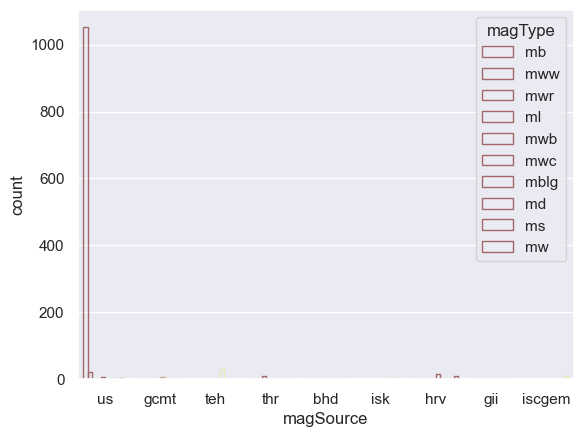

In [ ]:
sns.countplot(x="magSource", hue="magType", data=mydata, edgecolor=sns.color_palette("pink",3) ,  facecolor=(0, 0, 0, 0))
#barawrdaka daka ba wenayy crosstab ba wena

In [ ]:
pd.pivot_table(mydata, index=['magSource', 'magType'],
                     columns=[ 'locationSource'], aggfunc=len)

Unnamed: 22                                  depth       \
locationSource         iscgem  isk    teh   thr     us us_thr iscgem  isk   
magSource magType                                                           
bhd       md              NaN  NaN    NaN   NaN    2.0    NaN    NaN  NaN   
          ml              NaN  NaN    NaN   NaN    1.0    NaN    NaN  NaN   
gcmt      mwc             NaN  NaN    3.0   1.0    4.0    NaN    NaN  NaN   
gii       ml              NaN  NaN    NaN   NaN    1.0    NaN    NaN  NaN   
hrv       mw              NaN  NaN    NaN   NaN    9.0    NaN    NaN  NaN   
          mwc             NaN  NaN    NaN   1.0   16.0    NaN    NaN  NaN   
iscgem    mw              9.0  NaN    NaN   NaN    NaN    NaN    9.0  NaN   
isk       md              NaN  4.0    NaN   NaN    1.0    NaN    NaN  4.0   
          ml              NaN  NaN    NaN   NaN    2.0    NaN    NaN  NaN   
teh       mblg            NaN  NaN   21.0   3.0    6.0    NaN    NaN  NaN   
          ml              NaN  NaN    1.0   NaN    NaN    NaN    NaN  NaN   
thr       ml              NaN  NaN    2.0   6.0    3.0    NaN    NaN  NaN   
us        mb              NaN  5.0  143.0  26.0  877.0    1.0    NaN  5.0   
          ml              NaN  NaN    NaN   NaN    1.0    NaN    NaN  NaN   
          ms              NaN  NaN    NaN   NaN    5.0    NaN    NaN  NaN   
          mwb             NaN  NaN    3.0   NaN    5.0    NaN    NaN  NaN   
          mwr             NaN  NaN    NaN   NaN    1.0    NaN    NaN  NaN   
          mww             NaN  NaN    1.0   NaN   20.0    NaN    NaN  NaN   

                                ...   type                     updated       \
locationSource       teh   thr  ...    teh   thr     us us_thr  iscgem  isk   
magSource magType               ...                                           
bhd       md         NaN   NaN  ...    NaN   NaN    2.0    NaN     NaN  NaN   
          ml         NaN   NaN  ...    NaN   NaN    1.0    NaN     NaN  NaN   
gcmt      mwc        3.0   1.0  ...    3.0   1.0    4.0    NaN     NaN  NaN   
gii       ml         NaN   NaN  ...    NaN   NaN    1.0    NaN     NaN  NaN   
hrv       mw         NaN   NaN  ...    NaN   NaN    9.0    NaN     NaN  NaN   
          mwc        NaN   1.0  ...    NaN   1.0   16.0    NaN     NaN  NaN   
iscgem    mw         NaN   NaN  ...    NaN   NaN    NaN    NaN     9.0  NaN   
isk       md         NaN   NaN  ...    NaN   NaN    1.0    NaN     NaN  4.0   
          ml         NaN   NaN  ...    NaN   NaN    2.0    NaN     NaN  NaN   
teh       mblg      21.0   3.0  ...   21.0   3.0    6.0    NaN     NaN  NaN   
          ml         1.0   NaN  ...    1.0   NaN    NaN    NaN     NaN  NaN   
thr       ml         2.0   6.0  ...    2.0   6.0    3.0    NaN     NaN  NaN   
us        mb       143.0  26.0  ...  143.0  26.0  877.0    1.0     NaN  5.0   
          ml         NaN   NaN  ...    NaN   NaN    1.0    NaN     NaN  NaN   
          ms         NaN   NaN  ...    NaN   NaN    5.0    NaN     NaN  NaN   
          mwb        3.0   NaN  ...    3.0   NaN    5.0    NaN     NaN  NaN   
          mwr        NaN   NaN  ...    NaN   NaN    1.0    NaN     NaN  NaN   
          mww        1.0   NaN  ...    1.0   NaN   20.0    NaN     NaN  NaN   

                                              
locationSource       teh   thr     us us_thr  
magSource magType                             
bhd       md         NaN   NaN    2.0    NaN  
          ml         NaN   NaN    1.0    NaN  
gcmt      mwc        3.0   1.0    4.0    NaN  
gii       ml         NaN   NaN    1.0    NaN  
hrv       mw         NaN   NaN    9.0    NaN  
          mwc        NaN   1.0   16.0    NaN  
iscgem    mw         NaN   NaN    NaN    NaN  
isk       md         NaN   NaN    1.0    NaN  
          ml         NaN   NaN    2.0    NaN  
teh       mblg      21.0   3.0    6.0    NaN  
          ml         1.0   NaN    NaN    NaN  
thr       ml         2.0   6.0    3.0    NaN  
us        mb       143.0  26.0  877

In [ ]:
pd.pivot_table(mydata,'mag', index=['magSource', 'magType'],
                     columns=[ 'locationSource'])

locationSource       iscgem   isk       teh       thr        us  us_thr
magSource magType                                                      
bhd       md            NaN   NaN       NaN       NaN  4.050000     NaN
          ml            NaN   NaN       NaN       NaN  4.000000     NaN
gcmt      mwc           NaN   NaN  5.100000  4.900000  5.300000     NaN
gii       ml            NaN   NaN       NaN       NaN  4.600000     NaN
hrv       mw            NaN   NaN       NaN       NaN  5.388889     NaN
          mwc           NaN   NaN       NaN  5.200000  5.143750     NaN
iscgem    mw       5.966667   NaN       NaN       NaN       NaN     NaN
isk       md            NaN  3.15       NaN       NaN  4.600000     NaN
          ml            NaN   NaN       NaN       NaN  3.900000     NaN
teh       mblg          NaN   NaN  3.680952  3.833333  3.816667     NaN
          ml            NaN   NaN  4.100000       NaN       NaN     NaN
thr       ml            NaN   NaN  4.000000  3.583333  3.500000     NaN
us        mb            NaN  4.62  4.350350  4.334615  4.432725     4.1
          ml            NaN   NaN       NaN       NaN  3.700000     NaN
          ms            NaN   NaN       NaN       NaN  5.640000     NaN
          mwb           NaN   NaN  5.433333       NaN  5.360000     NaN
          mwr           NaN   NaN       NaN       NaN  5.300000     NaN
          mww           NaN   NaN  6.200000       NaN  5.560000     NaN

In [ ]:
pd.pivot_table(mydata,'depth', index=['magSource', 'magType'],
                     columns=[ 'locationSource'])

locationSource        iscgem    isk        teh        thr         us  us_thr
magSource magType                                                           
bhd       md             NaN    NaN        NaN        NaN  47.500000     NaN
          ml             NaN    NaN        NaN        NaN  10.000000     NaN
gcmt      mwc            NaN    NaN  10.333333  23.300000  20.200000     NaN
gii       ml             NaN    NaN        NaN        NaN  10.000000     NaN
hrv       mw             NaN    NaN        NaN        NaN  34.966667     NaN
          mwc            NaN    NaN        NaN  14.000000  34.475000     NaN
iscgem    mw       17.777778    NaN        NaN        NaN        NaN     NaN
isk       md             NaN  10.10        NaN        NaN  10.000000     NaN
          ml             NaN    NaN        NaN        NaN  22.500000     NaN
teh       mblg           NaN    NaN  11.876190  18.700000  13.616667     NaN
          ml             NaN    NaN  10.000000        NaN        NaN     NaN
thr       ml             NaN    NaN   6.200000  14.516667  17.233333     NaN
us        mb             NaN   9.72  11.272028  18.992308  25.184629    16.3
          ml             NaN    NaN        NaN        NaN  10.000000     NaN
          ms             NaN    NaN        NaN        NaN  36.200000     NaN
          mwb            NaN    NaN  16.433333        NaN  16.020000     NaN
          mwr            NaN    NaN        NaN        NaN  10.000000     NaN
          mww            NaN    NaN  10.200000        NaN  11.377500     NaN

In [ ]:
mydata['latitude'].std() #standard deviation bo latitude krduyatya au raqama

1.4347783973376784

In [ ]:
mydata['mag'].mean() #bo datakani mag meanman doziwatawa wata bo guri bumalarzaka meanman doziwatawa

4.453417721518988

array([[<Axes: title={'center': 'mb'}>, <Axes: title={'center': 'mblg'}>,
        <Axes: title={'center': 'md'}>],
       [<Axes: title={'center': 'ml'}>, <Axes: title={'center': 'ms'}>,
        <Axes: title={'center': 'mw'}>],
       [<Axes: title={'center': 'mwb'}>, <Axes: title={'center': 'mwc'}>,
        <Axes: title={'center': 'mwr'}>],
       [<Axes: title={'center': 'mww'}>, <Axes: >, <Axes: >]],
      dtype=object)

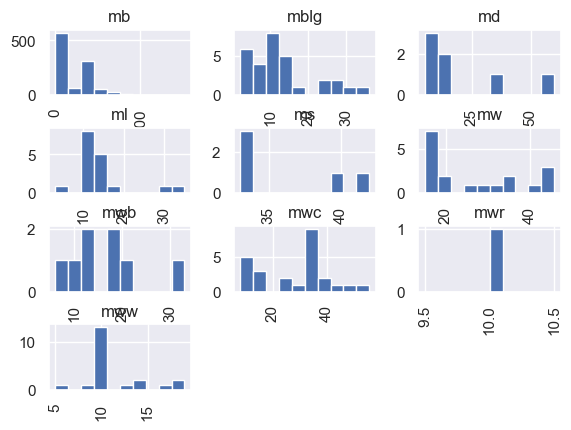

In [ ]:
mydata.hist(by='magType',column = 'depth') #keshani histogram bo magtype u depthi bumalarzakan ba har pewarek

In [ ]:
x = st.skewnorm.rvs(10, size=10000) # x variable w 10000 la har saple la 10ka

C:\Users\2024\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


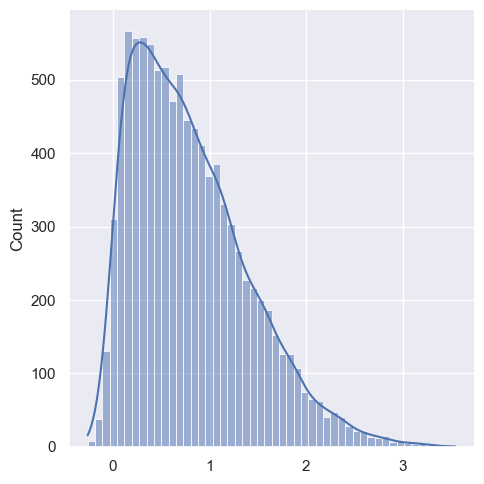

In [ ]:
_ = sns.displot(x,kde= True)  # right skew

C:\Users\2024\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


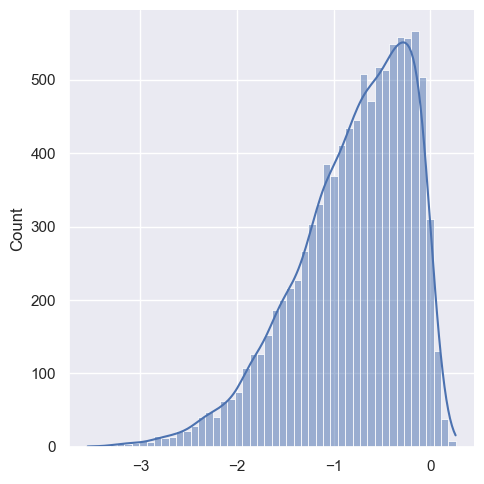

In [ ]:
_ = sns.displot(-x,kde= True)  # left skew  , wa agar bmanawe normalman bo darche size 10000 kam dakainawa

C:\Users\2024\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


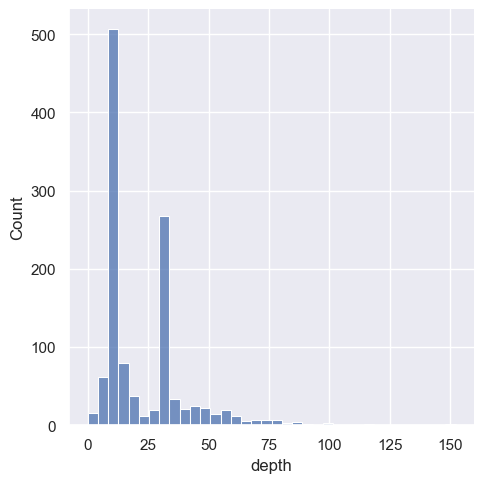

In [ ]:
sns.displot(mydata['depth'])

array([[<Axes: title={'center': 'mb'}>, <Axes: title={'center': 'mblg'}>,
        <Axes: title={'center': 'md'}>],
       [<Axes: title={'center': 'ml'}>, <Axes: title={'center': 'ms'}>,
        <Axes: title={'center': 'mw'}>],
       [<Axes: title={'center': 'mwb'}>, <Axes: title={'center': 'mwc'}>,
        <Axes: title={'center': 'mwr'}>],
       [<Axes: title={'center': 'mww'}>, <Axes: >, <Axes: >]],
      dtype=object)

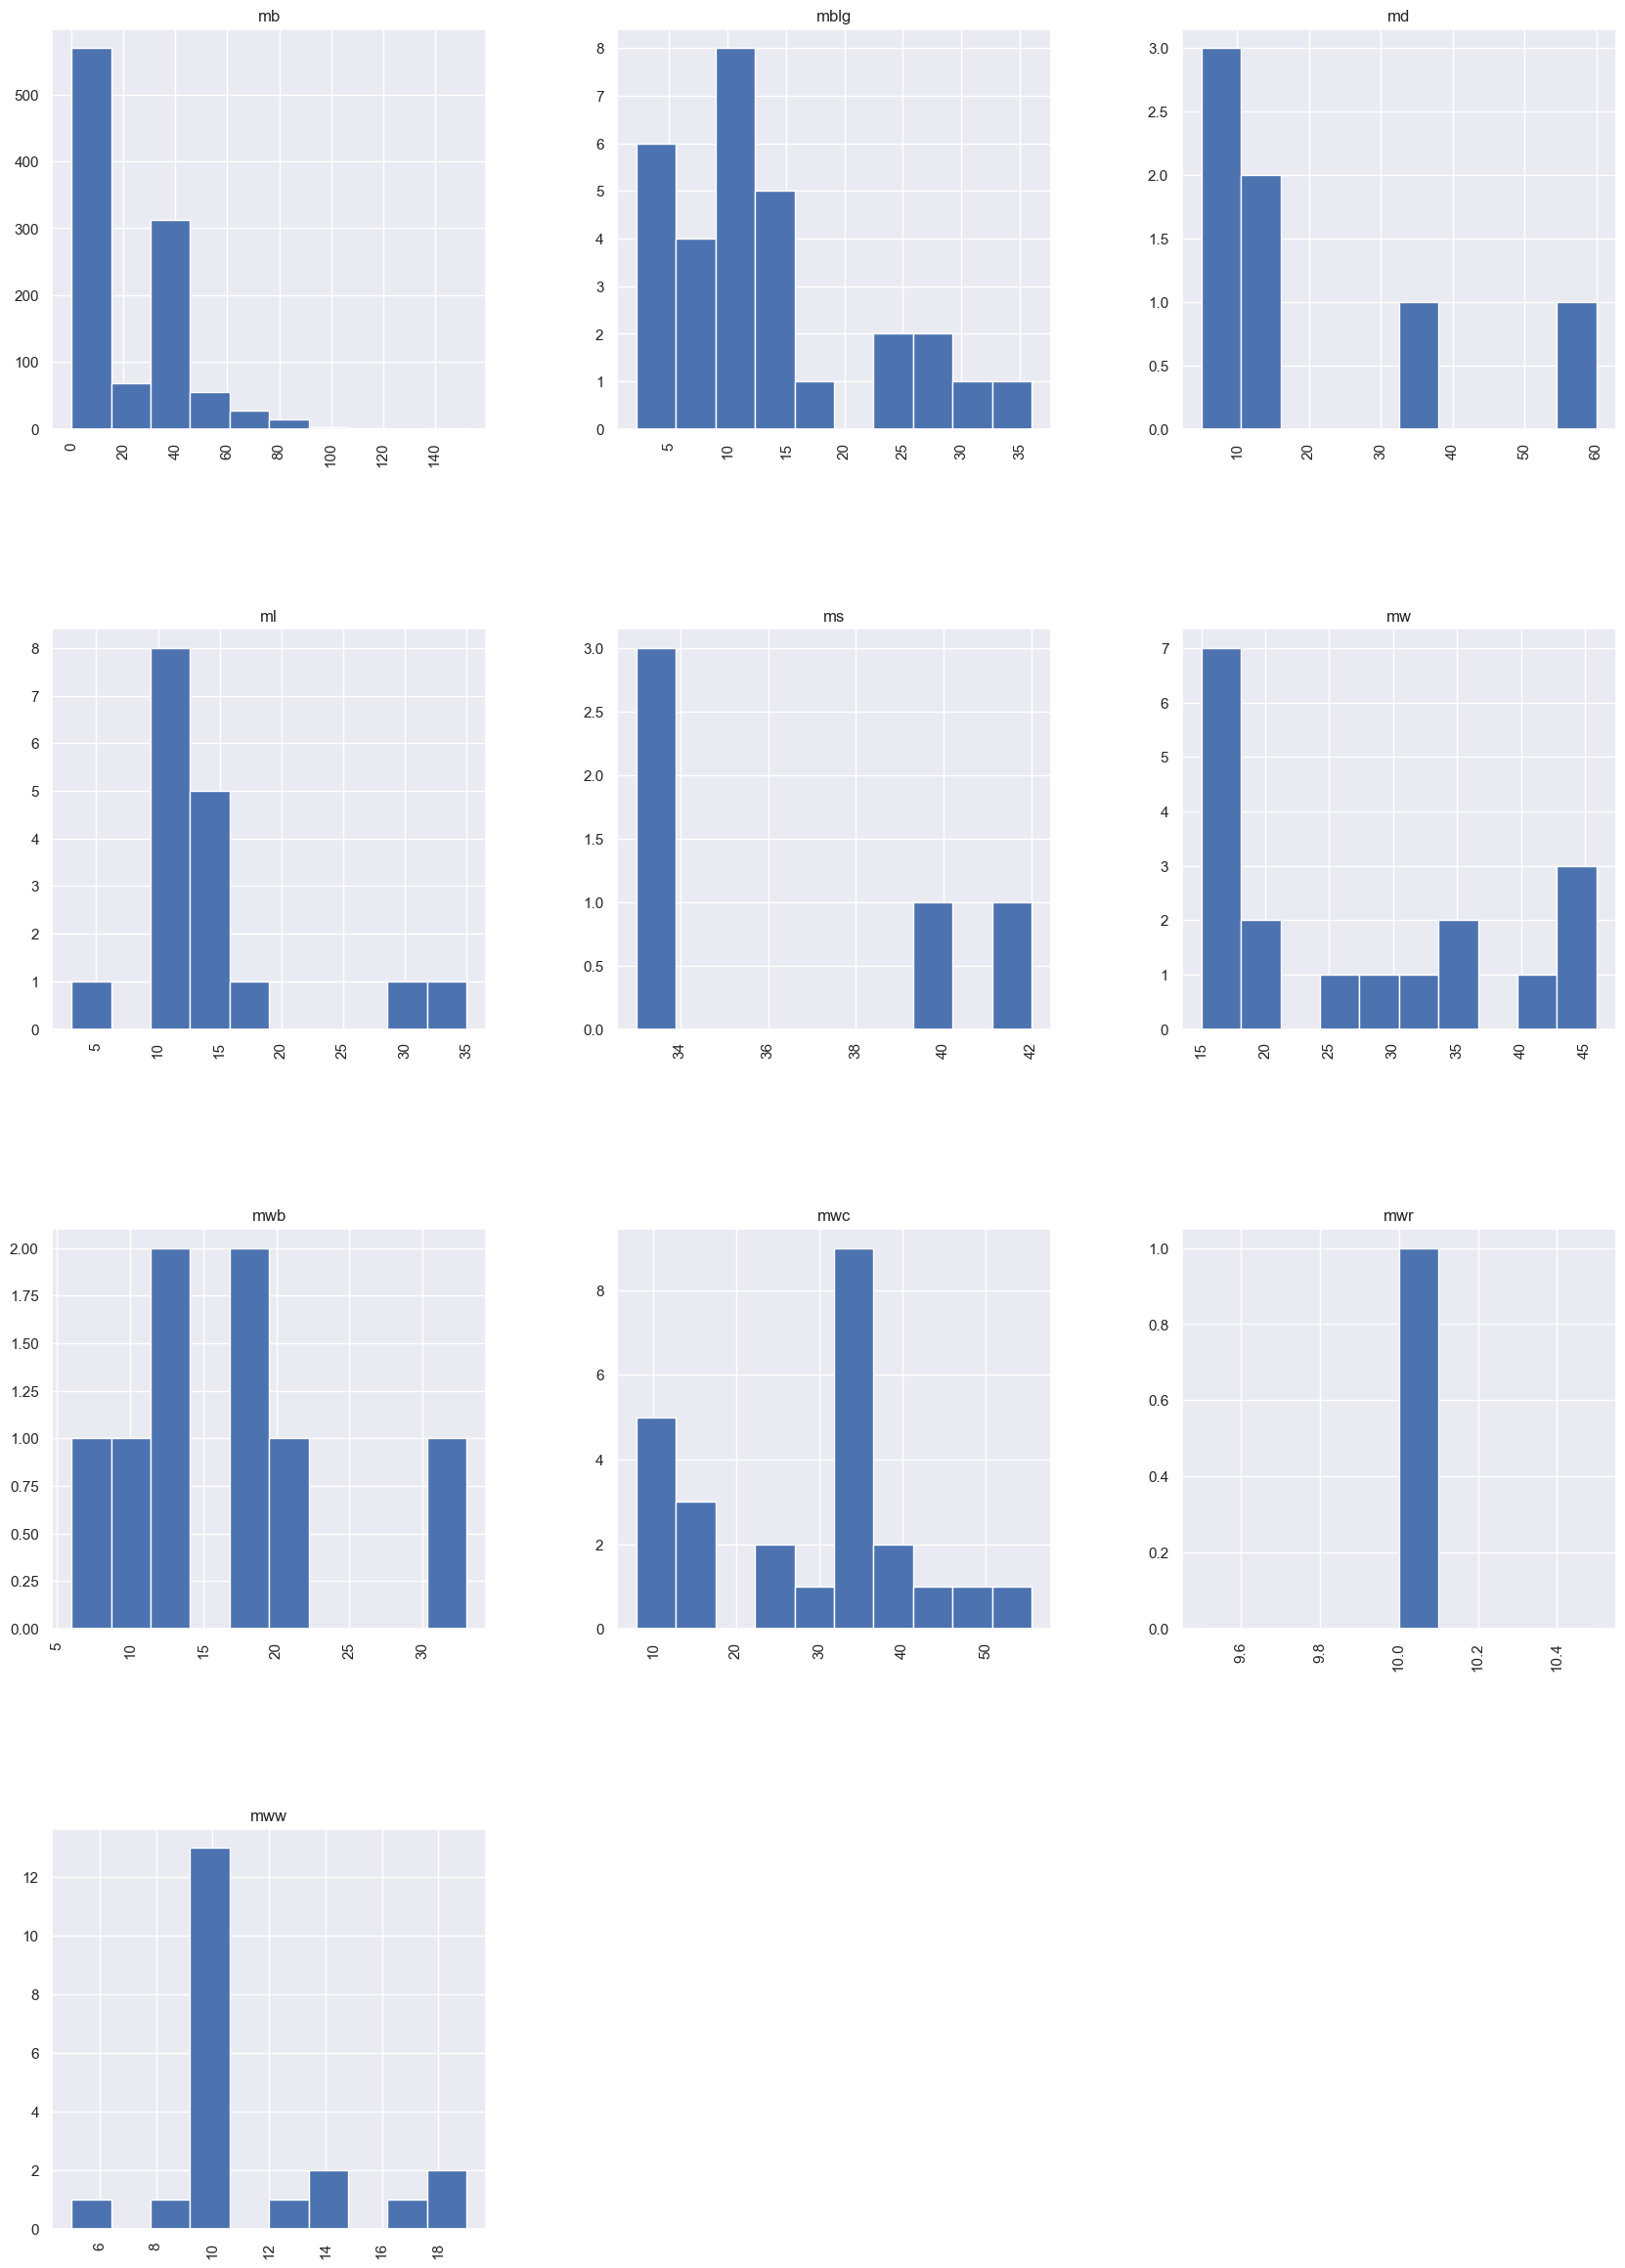

In [ ]:
mydata.hist(by='magType',column = 'depth', figsize=(20,30))

In [ ]:
x[1:10]

array([0.85354452, 0.45205399, 0.56813317, 0.38350429, 0.1172241 ,
       1.75426253, 0.38401634, 0.68667822, 0.07412646])

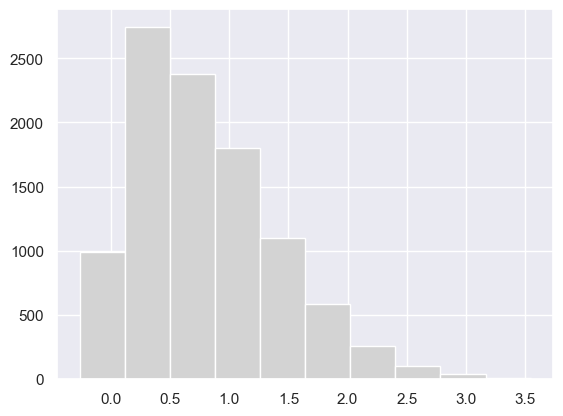

In [ ]:
fig, ax = plt.subplots()
_ = plt.hist(x, color = 'lightgray')

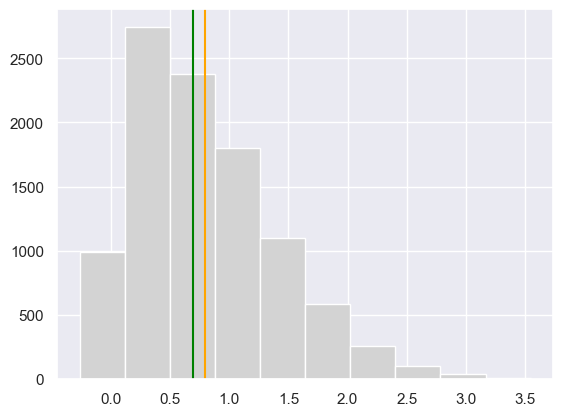

In [ ]:
fig, ax = plt.subplots()
plt.axvline(x = np.mean(x), color='orange')
plt.axvline(x = np.median(x), color='green')
_ = plt.hist(x, color = 'lightgray')

In [ ]:
xbar = x.mean() # xbar wata meanakay tyaya
xbar

0.7987475670419605

array([[<Axes: title={'center': 'iscgem'}>,
        <Axes: title={'center': 'isk'}>],
       [<Axes: title={'center': 'teh'}>, <Axes: title={'center': 'thr'}>],
       [<Axes: title={'center': 'us'}>,
        <Axes: title={'center': 'us_thr'}>]], dtype=object)

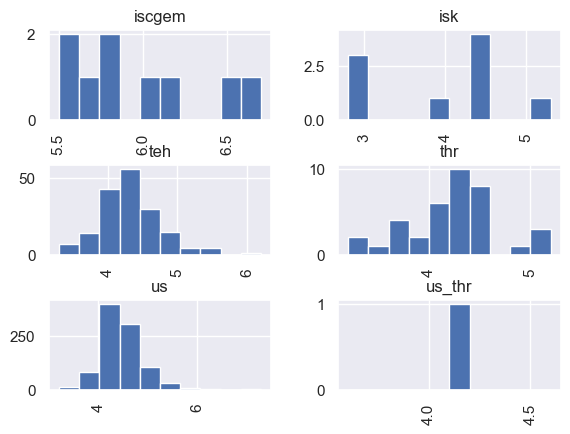

In [ ]:
mydata.hist(by='locationSource',column = 'mag')

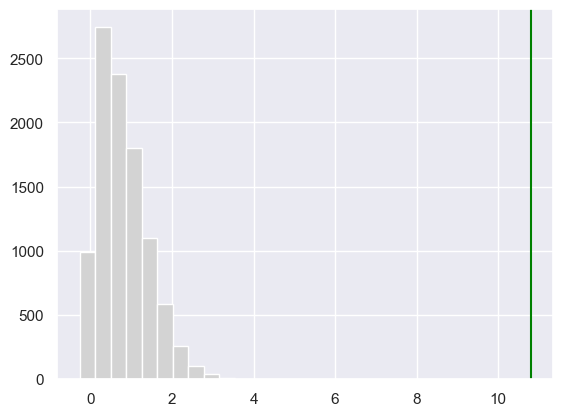

In [ ]:
fig, ax = plt.subplots()
plt.axvline(x = x.mean()+10, color='green')
_ = plt.hist(x, color = 'lightgrey')

In [ ]:
np.median(x)

0.6928212160080918

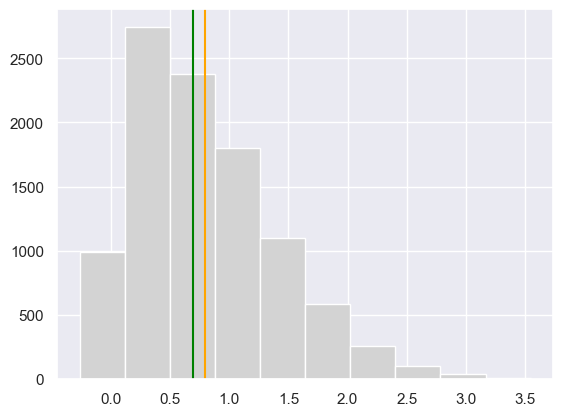

In [ ]:
fig, ax = plt.subplots()
plt.axvline(x = np.mean(x), color='orange')
plt.axvline(x = np.median(x), color='green')
_ = plt.hist(x, color = 'lightgray')

In [ ]:
x.var()# variance

0.36086523123610553

In [ ]:
x.var()**(1/2) # ** wata nrxy ragy 0.5 , ragy varyance dakata standard deviation

0.6007205933178132

In [ ]:
sigma = x.std() # standard deviatioin  std
sigma

0.6007205933178132

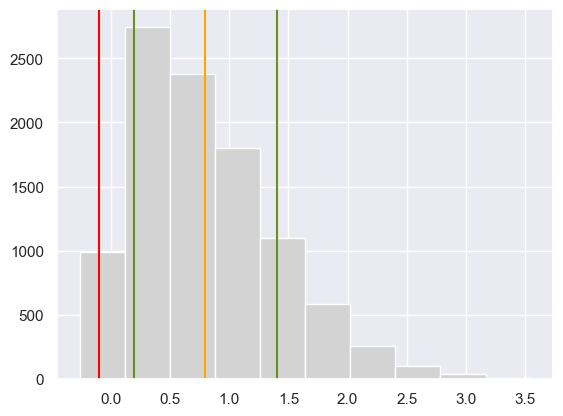

In [ ]:
fig, ax = plt.subplots()
plt.axvline(x = xbar , color='orange')
plt.axvline(x = xbar+sigma, color='olivedrab')
plt.axvline(x = xbar-sigma, color='olivedrab')
plt.axvline(x = xbar-sigma*1.5, color='red')
_ = plt.hist(x, color = 'lightgray')

In [ ]:
sigma/(x.size)**(1/2)  # standard error

0.006007205933178133

In [ ]:
st.sem(x) # defaults to 1 degree of freedom, which can be ignored with the larger data sets of ML , standard error bas ba methodakai

0.006007506316003691

In [ ]:
s= np.random.normal(size=10000)

C:\Users\2024\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


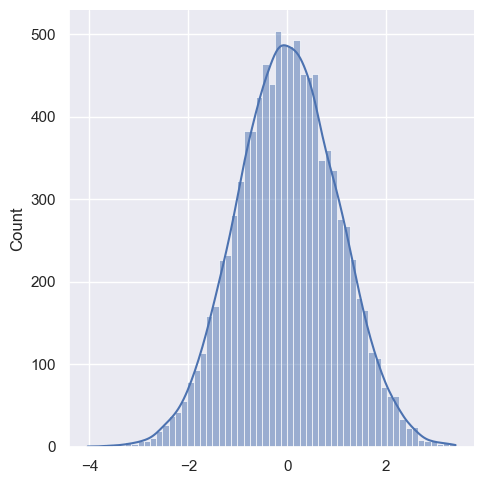

In [ ]:
 sns.displot(s, kde=True) # gaussian distribution or normal

In [ ]:
x.std()

0.6007205933178132

In [ ]:
x_sample = np.random.choice(x, size=11, replace=False)  #size wata data , sample , ka , replace false bo away zhmaray dubaray nabe
x_sample # mean y sample ka

array([1.06166002, 0.80956737, 1.71841707, 0.33985553, 0.2910161 ,
       0.86858176, 0.69722944, 1.62308009, 2.79006022, 1.23444441,
       0.50096289])

In [ ]:
x_sample.mean()

1.0849886266910402

In [ ]:
def sample_mean_calculator(input_dist, sample_size, n_samples): # sample mean calculation ka function ka ,number of
    #sample size chan sample , n sample zhmaray har sample
    sample_means = [] # array batala
    for i in range(n_samples):
        sample = np.random.choice(input_dist, size=sample_size, replace=False)
        sample_means.append(sample.mean())
    return sample_means

C:\Users\2024\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


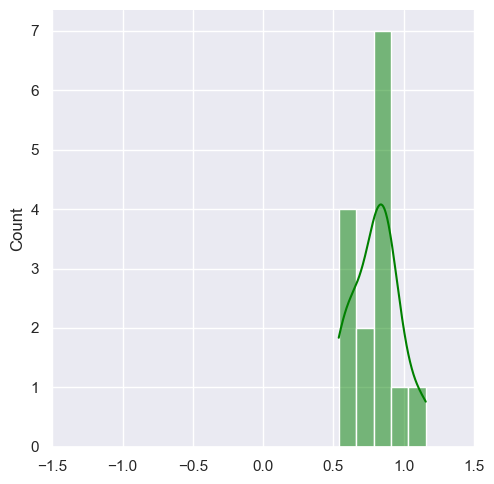

In [ ]:
sns.displot(sample_mean_calculator(x, 12, 15), color='green', kde=True)  # kde bo xataka labain ya bmene
_ = plt.xlim(-1.5, 1.5)  # sample 12   , w numbery har sample 15

C:\Users\2024\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


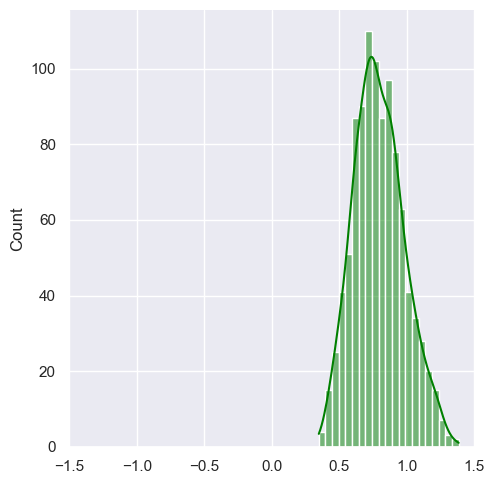

In [ ]:
sns.displot(sample_mean_calculator(x, 10, 1000), color='green', kde=True)  # kde ka la code be w la rasm nabe daykain ba false

_ = plt.xlim(-1.5, 1.5)